<a href="https://colab.research.google.com/github/karenpacheco2023/Parte-practica-parcial-3/blob/main/Parte_practica_tercer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files # Para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Estadistica descriptiva para variables cualitativas



*   Graficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa



In [3]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_nac2020.csv to asriosgu_nac2020.csv


In [4]:
io_csv = io.BytesIO(uploaded['asriosgu_nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [5]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
44,6,9
44,6,9
44,6,9
44,6,9


In [6]:
df2 = tabla1[(tabla1.T_GES < 9) & (tabla1["T_GES"] != 6) & (tabla1.TALLA_NAC < 9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


In [7]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-7-e608aef629bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
Name: T_GES, dtype: object

In [8]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

<ipython-input-8-4ae3ab049010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


COD_DPTO
52    4
20    5
Name: TALLA_NAC, dtype: object

In [9]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "Menos de 22"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == "4"), 'T_GES'] = "38-41"
df2.loc[(df2.T_GES == "5"), 'T_GES'] = "De 42 y más"
df2.loc[(df2.T_GES == "6"),'T_GES'] = "NA"
df2.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,4
20,38-41,5
27,38-41,5
27,38-41,4
27,38-41,5


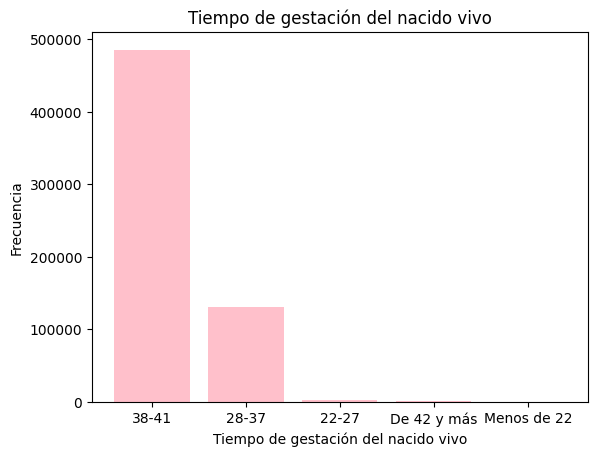

In [10]:
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "pink")
plt.title('Tiempo de gestación del nacido vivo')
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo de gestación del nacido vivo')
ax.set_ylabel('Frecuencia')
plt.show()

In [ ]:
sizes = np.array(y_values)
sizes

array([485433, 130485,   2236,   1163,     28])

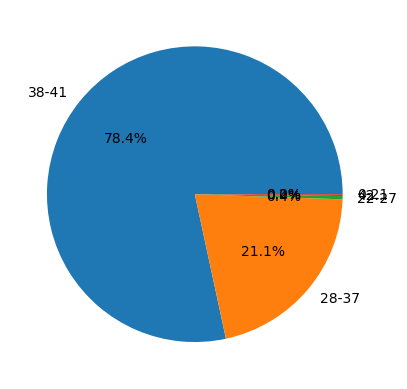

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [11]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38-41' '28-37' '22-27' 'De 42 y más' 'Menos de 22']
[78.37844819930734, 21.068225302537357, 0.3610265683908, 0.18777902461471394, 0.004520905149795348]


Aproximadamente el 78.38% de las niños de recién nacidos en Colombia tienen tiempo de gestación entre 38 y 41 semanas, el 21.07% entre 28 y 37 semanas, el 0.36% entre 22 y 27 semanas, el 0.19% entre 42 y más semanas, el 0.005% menos de 21 semanas.

In [12]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "Menos de 20"
df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20-29"
df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40-49"
df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50-59"
df2.loc[(df2.TALLA_NAC == "6"),"TALLA_NAC"] = "60 y Más."
df2.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59
27,38-41,40-49
27,38-41,50-59


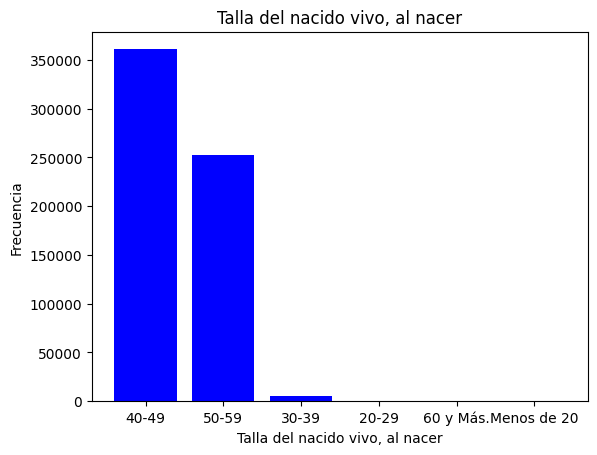

In [13]:
x_values = df2.TALLA_NAC.unique()
y_values = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = "blue")
plt.title('Talla del nacido vivo, al nacer')
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla del nacido vivo, al nacer')
ax.set_ylabel('Frecuencia')
plt.show()

In [ ]:
sizes = np.array(y_values)
sizes

array([361010, 252113,   5695,    411,    114,      2])

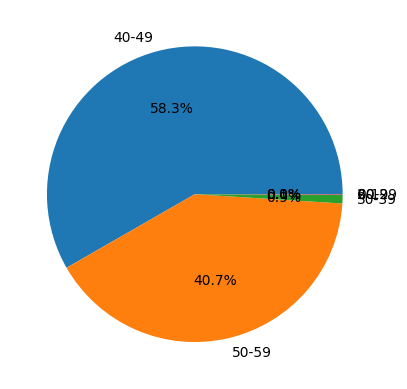

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [ ]:
len(df2.TALLA_NAC)

619345

In [ ]:
len(df2.T_GES)

619345

In [14]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values]
print(x_values)
print(porcentaje)

['40-49' '50-59' '30-39' '20-29' '60 y Más.' 'Menos de 20']
[58.28899886170067, 40.706391429655525, 0.9195198152887324, 0.06636042916306743, 0.018406542395595346, 0.00032292179641395344]


Aproximadamente el 58.29% de las niños de recién nacidos en Colombia tallan entre 40 y 49, el 40.71% entre 50 y 59, el 0.92% entre 30 y 39, el 0.07% entre 20 y 29, el 0.02% entre 60 y más y el 0.0003% menos de 20.

#Tablas de contingencia

*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



In [19]:
df2.loc[(df2.T_GES == 1), "T_GES"], df2.loc[(df2.T_GES == 2), "T_GES"], df2.loc[(df2.T_GES == 3), "T_GES"], df2.loc[(df2.T_GES == 4), "T_GES"], df2.loc[(df2.T_GES == 5), "T_GES"] = "Menos de 22", "22 a 27", "28 a 37","38 a 41","42 y más"
df2.loc[(df2.TALLA_NAC == 1), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 2), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 3), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 4), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 5), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 6), "TALLA_NAC"] = "Menos de 20", "20 a 29", "30 a 39","40 a 49","50 a 59", "60 y Más."
df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)
df2.head(3)

<ipython-input-19-16b3767e57e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59


In [20]:
tabla_cont = pd.crosstab(df2.TALLA_NAC, df2["T_GES"])
tabla_cont

T_GES,22-27,28-37,38-41,De 42 y más,Menos de 22
TALLA_NAC,,,,,
20-29,260,53,76,0,22
30-39,1872,3619,198,0,6
40-49,102,89212,162543,256,0
50-59,0,37593,322515,902,0
60 y Más.,0,8,101,5,0
Menos de 20,2,0,0,0,0


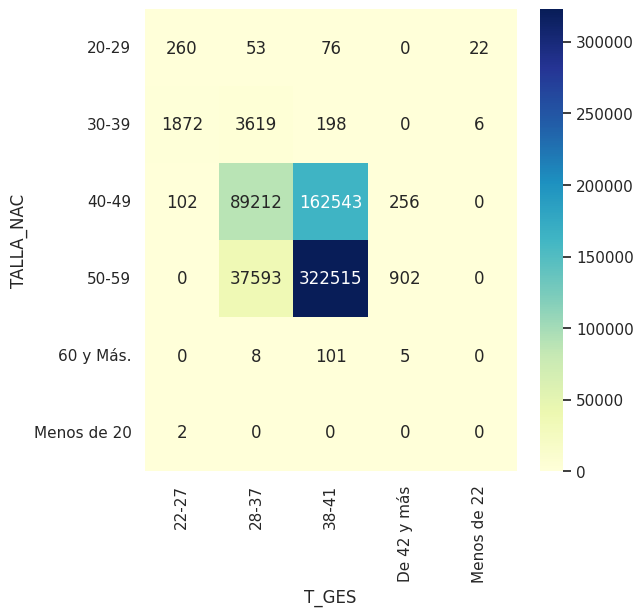

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()